In [1]:
%load_ext autoreload
%aimport data_creater
%autoreload 1

from data_creater import *

In [4]:
stocks = companies()
stocks

,Company,Symbol,Industry
0,3M,MMM,Conglomerate
1,American Express,AXP,Consumer finance
2,Apple,AAPL,Consumer electronics
3,Boeing,BA,Aerospace and defense
4,Caterpillar,CAT,Construction and mining equipment
5,Chevron,CVX,Oil & gas
6,Cisco Systems,CSCO,Computer networking
7,Coca-Cola,KO,Beverages
8,DowDuPont,DWDP,Chemical industry
9,ExxonMobil,XOM,Oil & gas


In [5]:
symbols = stocks['Symbol'].values.tolist()
print(symbols)

['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DWDP', 'XOM', 'WBA', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'DIS', 'GOOG', 'FB']


In [6]:
start_date = '20161101' 
end_date = '20181031'

#download quotes from yahoo and save to directory
for ticker in symbols:
    download = Downloader(ticker,start_date, end_date)
    download.save()

In [7]:
file_path = "./data\\{}\\quotes.csv"

for ticker in symbols:
    #check if file exist first
    if os.path.isfile(file_path.format(ticker)):
        feature = Feature_Selection.read_csv(ticker, file_path.format(ticker))
        feature.calculate_features()
        feature.normalize_data()
        feature.save_stock_data()
        feature.save_normalized_data()

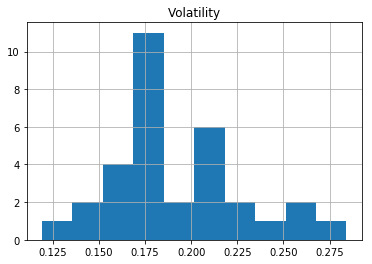

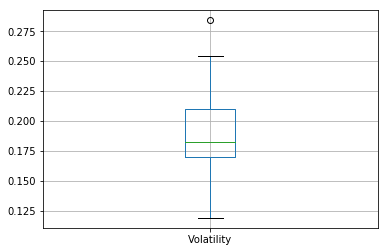

,Volatility
count,32.000000
mean,0.191962
std,0.035089
min,0.119175
25%,0.170242
50%,0.182394
75%,0.210312
max,0.284139


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

vols = [Volatility(ticker).annual for ticker in symbols]
dataset = pd.DataFrame({'Symbol':symbols,'Volatility':vols})

#volatility distribution
dataset.hist()
plt.show()
plt.savefig("./images/volatility_distribution.png")

#box plot to show range
dataset.boxplot()
plt.show()

#volatility statistics
dataset.describe()